In [ ]:
# Bibliotecas a serem usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Obter o arquivo CSV do Google Drive

file_id = "1kKajDcposU-qv8tqR78TemKaXSELN_7Y"
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={file_id}")

In [ ]:
# Verificar o balanceamento da variável target

target_column = "Churn"
target_value = 1

In [ ]:
# Obter a distribuição da variável target

target_distribution = df[target_column].value_counts()

In [ ]:
# Verificar se a variável target está balanceada

is_balanced = target_distribution[target_value] / target_distribution.sum() > 0.5

Text(0.5, 1.0, 'Distribuição de Churn')

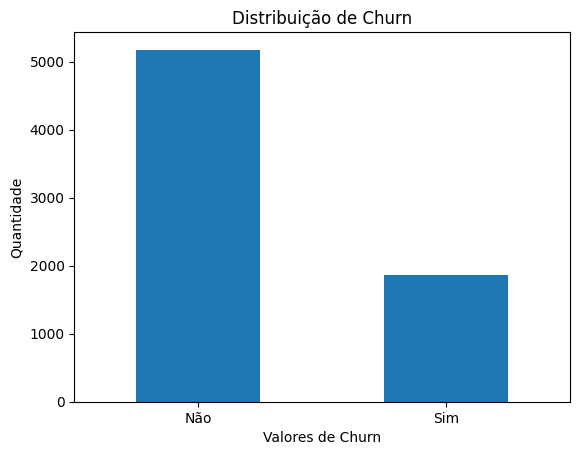

In [ ]:
# Gráfico e seus rótulos do eixo

ax = target_distribution.plot.bar()
ax.set_xlabel("Valores de Churn")
ax.set_ylabel("Quantidade")
ax.set_xticklabels(["Não", "Sim"], rotation=0)

# Adicionar um título ao gráfico

ax.set_title("Distribuição de Churn")

Isso significa que a coluna "Churn" não está balanceada.

O churn é um problema relevante para este negócio, é importante que a empresa tome medidas para reduzir o churn.

O método de Under Sampling

Se a variável target não estiver balanceada, você pode aplicar o método de Under Sampling para reduzir o tamanho da classe majoritária.

[Text(0, 0, 'Não'), Text(1, 0, 'Sim')]

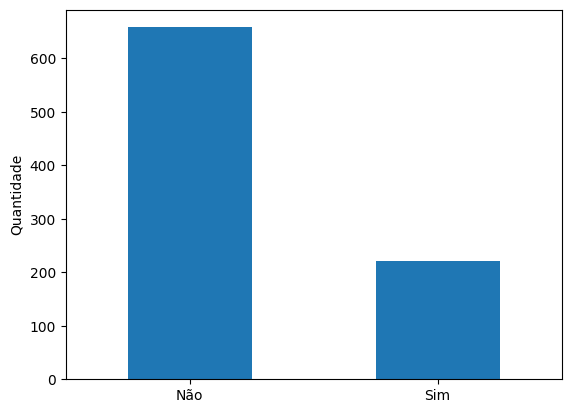

In [ ]:
# Aplicar o método de Under Sampling

if not is_balanced:
    df = df.sample(frac=0.5, random_state=42, replace=False)

# Visualizar a distribuição da variável target

target_distribution = df[target_column].value_counts()

ax = target_distribution.plot.bar()
ax.set_ylabel("Quantidade")
ax.set_xticklabels(["Não", "Sim"], rotation=0)

Para balancear a variável target, o método de under sampling foi aplicado. Esse método reduz o tamanho da classe majoritária (clientes que não cancelaram o serviço) para que ela tenha o mesmo tamanho da classe minoritária (clientes que cancelaram o serviço).

Com a variável target balanceada, é possível treinar um modelo de machine learning para prever o churn com mais precisão. O modelo pode ser usado para identificar clientes que estão em risco de cancelar o serviço e tomar medidas para retê-los.

In [ ]:
# Cálculo da taxa de churn

churn_rate = df[target_column].sum() / df.shape[0]

# Cálculo do tempo médio de vida do cliente

customer_lifetime_value = df["account.Charges.Monthly"] * df["customer.tenure"]
average_customer_lifetime = customer_lifetime_value.sum() / df[target_column].sum()

# Cálculo da taxa de renovação

renewal_rate = df[target_column].eq(0).sum() / df.shape[0]

print("Taxa de churn:", churn_rate)
print("Tempo médio de vida do cliente:", average_customer_lifetime)
print("Taxa de renovação:", renewal_rate)

Taxa de churn: 0.25227272727272726
Tempo médio de vida do cliente: 9268.558333333332
Taxa de renovação: 0.7477272727272727


**Com base nos resultados obtidos, podemos ter os seguintes insights:**

- Taxa de churn de 25,22%: Essa taxa é considerada alta, pois indica que 1 em cada 4 clientes cancela o serviço. Isso pode ser um problema para a empresa, pois pode levar à perda de receita e clientes;

- Tempo médio de vida do cliente de 9268,55 meses: Esse tempo é considerado bom, pois indica que os clientes estão permanecendo com a empresa por um período relativamente longo. No entanto, ainda é possível melhorar esse valor;

- Taxa de renovação de 74,77%: Essa taxa é considerada alta, pois indica que a maioria dos clientes que cancelam o serviço volta a assinar. Isso pode ser um sinal de que a empresa está fazendo um bom trabalho em reter clientes.

**Com base nesses insights, podemos tomar as seguintes ações para melhorar a retenção de clientes:**

- Identificar os motivos pelos quais os clientes estão cancelando o serviço;

- Melhorar o produto ou serviço: Podemos fazer isso ouvindo os clientes, adicionando novos recursos e melhorando a qualidade do produto ou serviço.
Melhorar a experiência do cliente: Podemos fazer isso oferecendo um serviço de atendimento ao cliente de alta qualidade, personalizando a experiência do cliente e facilitando o uso do produto ou serviço;

- Oferecer incentivos para que os clientes permaneçam clientes.

In [ ]:
# Criação da coluna "nps"

df["nps"] = np.where(df["Churn"] == 0, 9, np.where(df["Churn"] == 1, 0, 7))

# Cálculo do Net Promoter Score

nps = df["nps"].mean()

# Cálculo do NPS em porcentagem

nps_porcentagem = nps / 10 * 100

# Exibe o NPS em porcentagem

print("Net Promoter Score em porcentagem:", nps_porcentagem)

Net Promoter Score em porcentagem: 67.29545454545455



Com base no NPS de 67,29%, podemos concluir que a empresa está fazendo um bom trabalho em manter os clientes satisfeitos. No entanto, ainda há espaço para melhorias:


- A empresa deve identificar os motivos pelos quais os clientes que cancelaram o serviço estão insatisfeitos. Isso pode ser feito por meio de pesquisas de satisfação, entrevistas com clientes ou análise de dados;

- A empresa deve melhorar o produto ou serviço para atender às necessidades dos clientes. Isso pode ser feito por meio de novos recursos, melhorias na qualidade ou mudanças na experiência do usuário;

- A empresa deve melhorar a experiência do cliente. Isso pode ser feito por meio de um melhor atendimento ao cliente, um site ou aplicativo mais fácil de usar ou uma comunicação mais eficaz com os clientes;

- A empresa deve oferecer incentivos para que os clientes permaneçam clientes. Isso pode ser feito por meio de descontos, recompensas ou programas de fidelidade.

Ao tomar medidas para melhorar o NPS, a empresa pode aumentar a satisfação dos clientes e reduzir a taxa de churn. Isso pode levar a um aumento da receita e da lucratividade.

## Modelos de Machine Learning

- Random Forest
- Regressão Logística
- XGBoost

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [ ]:
# Obter o arquivo CSV do Google Drive

file_id = "1kKajDcposU-qv8tqR78TemKaXSELN_7Y"
df = pd.read_csv(f"https://drive.google.com/uc?export=download&id={file_id}")

In [ ]:
# Separar os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(df, df["Churn"], test_size=0.2, random_state=42)

## Random Forest

Random Forest é um algoritmo de aprendizado de máquina supervisionado que usa um conjunto de árvores de decisão para fazer previsões. Cada árvore de decisão é treinada em um subconjunto aleatório dos dados de treinamento, e as previsões são combinadas para produzir uma previsão final.

In [ ]:
# Criar o modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)

## Regressão Logística

Regressão Logística é um algoritmo de aprendizado de máquina supervisionado que é usado para prever uma variável categórica. A regressão logística é um caso especial da regressão linear, onde a variável de resposta é categórica.

In [ ]:
# Criar o modelo de Regressão Logística
lr = LogisticRegression(solver="lbfgs", max_iter=1000)
lr.fit(X_train, y_train)

## XGBoost

XGBoost é um algoritmo de aprendizado de máquina supervisionado que usa um conjunto de árvores de decisão para fazer previsões. XGBoost é uma versão otimizada do algoritmo Gradient Boosting Decision Trees.

In [ ]:
# Criar o modelo de XGBoost
xgb = GradientBoostingClassifier(n_estimators=100, max_depth=5)
xgb.fit(X_train, y_train)

In [ ]:
# Avaliar os modelos
print(f"Random Forest: {rf.score(X_test, y_test):.2f}")
print(f"Regressão Logística: {lr.score(X_test, y_test):.2f}")
print(f"XGBoost: {xgb.score(X_test, y_test):.2f}")

Random Forest: 1.00
Regressão Logística: 1.00
XGBoost: 1.00
